In [27]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pymongo import MongoClient

import os
import tqdm
import requests

from multiprocessing import Pool
import time
import itertools

import query_methods

In [3]:
import datetime

In [7]:
datetime.datetime.isoformat(datetime.datetime.now())[:-10]

'2020-06-19T20:11'

In [37]:
match_id = 5117355338

result = requests.get(f"https://api.opendota.com/api/matches/{match_id}").json()

KeyboardInterrupt: 

In [14]:
requests.get(f"https://api.opendota.com/api/heroes")

KeyboardInterrupt: 

In [4]:
heroes = pd.DataFrame(requests.get(f"https://api.opendota.com/api/heroes").json())

In [5]:
heroes

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2
...,...,...,...,...,...,...,...
114,120,npc_dota_hero_pangolier,Pangolier,agi,Melee,"[Carry, Nuker, Disabler, Durable, Escape, Init...",2
115,121,npc_dota_hero_grimstroke,Grimstroke,int,Ranged,"[Support, Nuker, Disabler, Escape]",2
116,126,npc_dota_hero_void_spirit,Void Spirit,int,Melee,"[Carry, Escape, Nuker, Disabler]",2
117,128,npc_dota_hero_snapfire,Snapfire,str,Ranged,"[Support, Nuker, Disabler, Escape]",2


In [39]:
output = []

for n in np.arange(100,500, 200):
    
    request = requests.get("https://api.opendota.com/api/proMatches?less_than_match_id={}7355338".format(n)).json()
    
    output.append(request)

In [41]:
pd.DataFrame(output)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"{'match_id': 1007336904, 'duration': 2048, 'st...","{'match_id': 1007273774, 'duration': 2880, 'st...","{'match_id': 1007268164, 'duration': 1732, 'st...","{'match_id': 1007100692, 'duration': 1521, 'st...","{'match_id': 1007046405, 'duration': 2549, 'st...","{'match_id': 1007038410, 'duration': 2253, 'st...","{'match_id': 1006991368, 'duration': 1737, 'st...","{'match_id': 1006936170, 'duration': 2549, 'st...","{'match_id': 1006920184, 'duration': 3639, 'st...","{'match_id': 1006891573, 'duration': 2006, 'st...",...,"{'match_id': 1000416244, 'duration': 1838, 'st...","{'match_id': 1000392466, 'duration': 1457, 'st...","{'match_id': 1000352316, 'duration': 1224, 'st...","{'match_id': 1000330160, 'duration': 1935, 'st...","{'match_id': 1000318480, 'duration': 2660, 'st...","{'match_id': 1000309532, 'duration': 1429, 'st...","{'match_id': 1000308686, 'duration': 3936, 'st...","{'match_id': 1000290559, 'duration': 925, 'sta...","{'match_id': 1000226003, 'duration': 1442, 'st...","{'match_id': 1000191154, 'duration': 2496, 'st..."
1,"{'match_id': 3007293183, 'duration': 1341, 'st...","{'match_id': 3006969246, 'duration': 2109, 'st...","{'match_id': 3006919763, 'duration': 1385, 'st...","{'match_id': 3006862938, 'duration': 4305, 'st...","{'match_id': 3006807982, 'duration': 1864, 'st...","{'match_id': 3006738150, 'duration': 2439, 'st...","{'match_id': 3006699582, 'duration': 1227, 'st...","{'match_id': 3006479180, 'duration': 2123, 'st...","{'match_id': 3006373987, 'duration': 2188, 'st...","{'match_id': 3006260031, 'duration': 2667, 'st...",...,"{'match_id': 3000119731, 'duration': 3555, 'st...","{'match_id': 3000021292, 'duration': 2136, 'st...","{'match_id': 3000020100, 'duration': 5276, 'st...","{'match_id': 2999919744, 'duration': 2565, 'st...","{'match_id': 2999907435, 'duration': 2346, 'st...","{'match_id': 2999737824, 'duration': 2352, 'st...","{'match_id': 2999684669, 'duration': 1052, 'st...","{'match_id': 2999668332, 'duration': 2879, 'st...","{'match_id': 2999617933, 'duration': 2179, 'st...","{'match_id': 2999569127, 'duration': 1792, 'st..."


# Mongo stuff

In [6]:
heroes.shape

(119, 7)

In [7]:
heroes.sample(5)

,id,name,localized_name,primary_attr,attack_type,roles,legs
68,70,npc_dota_hero_ursa,Ursa,agi,Melee,"[Carry, Jungler, Durable, Disabler]",2
86,88,npc_dota_hero_nyx_assassin,Nyx Assassin,agi,Melee,"[Disabler, Nuker, Initiator, Escape]",6
57,59,npc_dota_hero_huskar,Huskar,str,Ranged,"[Carry, Durable, Initiator]",2
101,103,npc_dota_hero_elder_titan,Elder Titan,str,Melee,"[Initiator, Disabler, Nuker, Durable]",2
112,114,npc_dota_hero_monkey_king,Monkey King,agi,Melee,"[Carry, Escape, Disabler, Initiator]",2


In [8]:
all_.sample(5)

NameError: name 'all_' is not defined

In [9]:
client = MongoClient('mongodb://localhost:27017/')
db = client['dota']

In [10]:
all_ = pd.DataFrame(list(db.matches_pgroup_format.find({})))

KeyboardInterrupt: 

In [ ]:
team1_heroes = all_.columns[[4,6,8,10,12]].values
team2_heroes = all_.columns[[14,16,18,20,22]].values

In [11]:
all_.head()

NameError: name 'all_' is not defined

In [16]:
from tqdm.notebook import tqdm

tqdm.pandas()

/home/conor/miniconda3/envs/PHD/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
all_["Radiant_heros"] = all_.progress_apply(lambda row: np.stack([row[f"hero_id{p}"] for p in [0,1,2,3,4]]), axis = 1)

In [ ]:
all_["Dire_heros"] = all_.progress_apply(lambda row: np.stack([row[f"hero_id{p}"] for p in [128,129,130,131,132]]), axis = 1)

In [16]:
hero_synergy((107,109))

(107, 109, 0.47472318789530915)

In [52]:
all_.query("radiant_win == 't'").Radiant_heros.iloc[-3]

array([20, 14, 74,  1, 11])

In [36]:
def hero_synergy(input_):
    
    h1, h2 = input_[0], input_[1]
    
    radiant_win_matches = all_.query("radiant_win == 't'")
    dire_win_matches = all_.query("radiant_win == 'f'")
    
    radiant_w = np.any(np.isin(np.stack(radiant_win_matches.Radiant_heros.values), [h1,h2]) == True, axis = 1).sum()
    radiant_l = np.any(np.isin(np.stack(dire_win_matches.Radiant_heros.values), [h1,h2]) == True, axis = 1).sum()
    
    dire_w = np.any(np.isin(np.stack(dire_win_matches.Dire_heros.values), [h1,h2]) == True, axis = 1).sum()
    dire_l = np.any(np.isin(np.stack(radiant_win_matches.Dire_heros.values), [h1,h2]) == True, axis = 1).sum()
    
    return (h1, h2, (radiant_w + dire_w)/(radiant_l + dire_l + radiant_w + dire_w))

In [50]:
def hero_adversity(input_):
    
    h1, h2 = input_[0], input_[1]

    radiant_win_matches = all_.query("radiant_win == 't'")
    dire_win_matches = all_.query("radiant_win == 'f'")

    #h1 wins as radiant
    a = np.any(np.isin(np.stack(radiant_win_matches.Radiant_heros.values), [h1]) == True, axis = 1)
    b = np.any(np.isin(np.stack(radiant_win_matches.Dire_heros.values), [h2]) == True, axis = 1)
    h1wr = (a & b).sum()

    #h1 wins as dire
    a = np.any(np.isin(np.stack(dire_win_matches.Dire_heros.values), [h1]) == True, axis = 1)
    b = np.any(np.isin(np.stack(dire_win_matches.Radiant_heros.values), [h2]) == True, axis = 1)
    h1wd = (a & b).sum()

    #h2 wins as radiant
    a = np.any(np.isin(np.stack(radiant_win_matches.Radiant_heros.values), [h2]) == True, axis = 1)
    b = np.any(np.isin(np.stack(radiant_win_matches.Dire_heros.values), [h1]) == True, axis = 1)
    h2wr = (a & b).sum()

    #h2 wins as dire
    a = np.any(np.isin(np.stack(dire_win_matches.Dire_heros.values), [h2]) == True, axis = 1)
    b = np.any(np.isin(np.stack(dire_win_matches.Radiant_heros.values), [h1]) == True, axis = 1)
    h2wd = (a & b).sum()

    return (h1, h2, (h1wr + h1wd)/(h1wr + h1wd + h2wr + h2wd))

In [51]:
hero_adversity((1,109))

(1, 109, 0.4574881312041433)

In [106]:
list(itertools.combinations(heroes["id"].sample(3), r=2))

[(25, 56), (25, 92), (56, 92)]

In [119]:
np.array([(h1, h2) for h1 in heroes["id"] for h2 in heroes["id"] if h1!=h2])

array([[  1,   2],
       [  1,   3],
       [  1,   4],
       ...,
       [129, 121],
       [129, 126],
       [129, 128]])

In [15]:
all_.sample(5)

,_id,match_id,radiant_win,account_id0,hero_id0,account_id1,hero_id1,account_id2,hero_id2,account_id3,...,account_id129,hero_id129,account_id130,hero_id130,account_id131,hero_id131,account_id132,hero_id132,Radiant_heros,Dire_heros
349537,5de94b69fd6a1c84c01b5e74,2042411812,f,19852,44,45492807,15,4294967295,2,4294967295,...,4294967295,101,4294967295,36,158011017,99,4294967295,112,"[44, 15, 2, 35, 14]","[42, 101, 36, 99, 112]"
1648090,5de94b9261dbcd4b449c059d,2306322403,t,4294967295,54,4294967295,4,4294967295,73,4294967295,...,4294967295,93,4294967295,35,4294967295,13,4294967295,62,"[54, 4, 73, 8, 44]","[104, 93, 35, 13, 62]"
1017304,5de94b7e52a9d8061723b5f5,2304886614,f,4294967295,46,4294967295,56,4294967295,31,4294967295,...,4294967295,74,4294967295,81,4294967295,111,4294967295,17,"[46, 56, 31, 14, 4]","[104, 74, 81, 111, 17]"
1001732,5de94b7d52a9d80617237921,945287864,f,35989075,58,4294967295,96,4899179,23,9074488,...,70427180,43,65670582,16,181206029,7,147403230,44,"[58, 96, 23, 27, 40]","[102, 43, 16, 7, 44]"
230282,5de94b65a1770f960758ad40,2042122723,t,213498570,23,143024761,7,293535613,9,266133064,...,144047599,21,134402224,3,4294967295,95,4294967295,16,"[23, 7, 9, 19, 18]","[49, 21, 3, 95, 16]"


In [16]:
row = all_.iloc[0,:]

In [20]:
dataset = pd.DataFrame()

In [34]:
{row:i for i, row in heroes.id.iteritems()}

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 25: 23,
 26: 24,
 27: 25,
 28: 26,
 29: 27,
 30: 28,
 31: 29,
 32: 30,
 33: 31,
 34: 32,
 35: 33,
 36: 34,
 37: 35,
 38: 36,
 39: 37,
 40: 38,
 41: 39,
 42: 40,
 43: 41,
 44: 42,
 45: 43,
 46: 44,
 47: 45,
 48: 46,
 49: 47,
 50: 48,
 51: 49,
 52: 50,
 53: 51,
 54: 52,
 55: 53,
 56: 54,
 57: 55,
 58: 56,
 59: 57,
 60: 58,
 61: 59,
 62: 60,
 63: 61,
 64: 62,
 65: 63,
 66: 64,
 67: 65,
 68: 66,
 69: 67,
 70: 68,
 71: 69,
 72: 70,
 73: 71,
 74: 72,
 75: 73,
 76: 74,
 77: 75,
 78: 76,
 79: 77,
 80: 78,
 81: 79,
 82: 80,
 83: 81,
 84: 82,
 85: 83,
 86: 84,
 87: 85,
 88: 86,
 89: 87,
 90: 88,
 91: 89,
 92: 90,
 93: 91,
 94: 92,
 95: 93,
 96: 94,
 97: 95,
 98: 96,
 99: 97,
 100: 98,
 101: 99,
 102: 100,
 103: 101,
 104: 102,
 105: 103,
 106: 104,
 107: 105,
 108: 106,
 109: 107,
 110: 108,
 111: 109,
 112: 1

In [29]:
dict(heroes.id)

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 25,
 24: 26,
 25: 27,
 26: 28,
 27: 29,
 28: 30,
 29: 31,
 30: 32,
 31: 33,
 32: 34,
 33: 35,
 34: 36,
 35: 37,
 36: 38,
 37: 39,
 38: 40,
 39: 41,
 40: 42,
 41: 43,
 42: 44,
 43: 45,
 44: 46,
 45: 47,
 46: 48,
 47: 49,
 48: 50,
 49: 51,
 50: 52,
 51: 53,
 52: 54,
 53: 55,
 54: 56,
 55: 57,
 56: 58,
 57: 59,
 58: 60,
 59: 61,
 60: 62,
 61: 63,
 62: 64,
 63: 65,
 64: 66,
 65: 67,
 66: 68,
 67: 69,
 68: 70,
 69: 71,
 70: 72,
 71: 73,
 72: 74,
 73: 75,
 74: 76,
 75: 77,
 76: 78,
 77: 79,
 78: 80,
 79: 81,
 80: 82,
 81: 83,
 82: 84,
 83: 85,
 84: 86,
 85: 87,
 86: 88,
 87: 89,
 88: 90,
 89: 91,
 90: 92,
 91: 93,
 92: 94,
 93: 95,
 94: 96,
 95: 97,
 96: 98,
 97: 99,
 98: 100,
 99: 101,
 100: 102,
 101: 103,
 102: 104,
 103: 105,
 104: 106,
 105: 107,
 106: 108,
 107: 109,
 108: 110,
 109: 111,
 110: 1

In [9]:
synergy = pd.read_pickle("synergy.pickle")

In [9]:
adversity = pd.read_pickle("adversity.pickle")

In [11]:
all_ = pd.read_pickle("data_new.pickle")

In [28]:
all_.shape

(1722636, 25)

In [26]:
def synergy_rates(row):
    
    out = []

    for pair in itertools.combinations(row.Radiant_heros, r = 2):
        
        #print(pair)
        
        h1, h2 = dict(heroes.id)[pair[0]], dict(heroes.id)[pair[1]]
        
        try:
        
            out.append(synergy.loc[(h1, h2)])
            
        except TypeError:
            
            #print(pair)
            pass
            
        except: 
            
            print(h1, h2)
            out.append(synergy.loc[(h1, h2)[::-1]])
            


    return out

In [86]:
def get_win_rates(row):
    
    out = []

    for team in [row.Radiant_heros, row.Dire_heros]:
        for pair in itertools.combinations(team, r = 2):

            h1, h2 = dict(heroes.id)[pair[0]], dict(heroes.id)[pair[1]]

            try:
                out.append(synergy.loc[(h1, h2)].values)

            except: 

                out.append(synergy.loc[(h1, h2)[::-1]].values)
            

    return np.concatenate(out)

In [23]:
synergy.loc[(1,33)]

Win rate    0.484106
Name: (1, 33), dtype: float64

In [88]:
dataset = pd.DataFrame()

In [89]:
samp = all_.sample(1)

dataset = samp.progress_apply(lambda row: get_win_rates(row), axis = 1)

In [94]:
dataset.values[0].shape

(20,)

In [ ]:
all_["Dire_heros"] = all_.progress_apply(lambda row: np.stack([row[f"hero_id{p}"] for p in [128,129,130,131,132]]), axis = 1)

In [126]:
from multiprocessing import Pool

if __name__ == '__main__':
    
    list_ = heroes["id"]#.sample(5)
    
    with Pool(4) as p:

        r = list(tqdm(p.imap(hero_synergy, itertools.combinations(list_, r = 2)), total = len(list_)))



  0%|          | 0/119 [00:00<?, ?it/s]

  1%|          | 1/119 [00:06<13:17,  6.76s/it]

  4%|▍         | 5/119 [00:12<09:46,  5.15s/it]

  5%|▌         | 6/119 [00:12<06:52,  3.65s/it]

  8%|▊         | 9/119 [00:18<05:43,  3.12s/it]

  9%|▉         | 11/119 [00:18<04:00,  2.23s/it]

 11%|█         | 13/119 [00:24<04:17,  2.43s/it]

 13%|█▎        | 15/119 [00:24<02:59,  1.72s/it]

 14%|█▍        | 17/119 [00:30<03:31,  2.07s/it]

 15%|█▌        | 18/119 [00:30<02:30,  1.49s/it]

 16%|█▌        | 19/119 [00:30<01:47,  1.07s/it]

 18%|█▊        | 21/119 [00:35<02:26,  1.50s/it]

 18%|█▊        | 22/119 [00:35<01:48,  1.12s/it]

 21%|██        | 25/119 [00:40<02:00,  1.28s/it]

 22%|██▏       | 26/119 [00:40<01:33,  1.00s/it]

 24%|██▍       | 29/119 [00:45<01:44,  1.16s/it]

 25%|██▌       | 30/119 [00:45<01:17,  1.15it/s]

 26%|██▌       | 31/119 [00:45<01:00,  1.45it/s]

 28%|██▊       | 33/119 [00:50<01:39,  1.15s/it]

 29%|██▊       | 34/119 [00:50<01:12,  1.17it/s]

 29%|██▉   

In [54]:
from multiprocessing import Pool

if __name__ == '__main__':
    
    list_ = heroes["id"]#.sample(5)
    
    with Pool(4) as p:

        r = list(tqdm(p.imap(hero_adversity, np.array([(h1, h2) for h1 in list_ for h2 in list_ if h1!=h2])), total = len(list_)))

/home/conor/miniconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars
/home/conor/miniconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars
/home/conor/miniconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars
/home/conor/miniconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


In [55]:
adversity = pd.DataFrame(r, columns = ["Hero_1", "Hero_2", "Win rate"]).set_index(["Hero_1", "Hero_2"])

In [56]:
adversity.to_pickle(os.getcwd() + "/adversity.pickle")

In [120]:
synergy_mat = np.zeros((heroes["id"].max(), heroes["id"].max()))

for t in r:
    
    synergy_mat[t[0], t[1]] = t[-1]

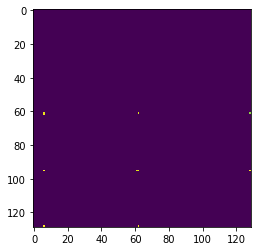

In [121]:
plt.imshow(synergy_mat)

In [17]:
all_df = pd.DataFrame(all_)

In [54]:
hero_pairs = np.array(list((itertools.combinations(heroes["id"].values, r = 2))))

np.hstack(np.array([hero_pairs ,[db for _ in range(hero_pairs.shape[0])]]))

ValueError: could not broadcast input array from shape (7021,2) into shape (7021)

In [59]:
r

[{'Hero_1': 1, 'Hero_2': 2, 'Win_rate': 0.5071743724741389},
 {'Hero_1': 1, 'Hero_2': 3, 'Win_rate': 0.5061493157803568},
 {'Hero_1': 1, 'Hero_2': 4, 'Win_rate': 0.509805834715582},
 {'Hero_1': 1, 'Hero_2': 5, 'Win_rate': 0.515604337476858},
 {'Hero_1': 2, 'Hero_2': 3, 'Win_rate': 0.49872665534804755},
 {'Hero_1': 2, 'Hero_2': 4, 'Win_rate': 0.5107954816262332},
 {'Hero_1': 2, 'Hero_2': 5, 'Win_rate': 0.5115400755350399},
 {'Hero_1': 3, 'Hero_2': 4, 'Win_rate': 0.5012366034624897},
 {'Hero_1': 3, 'Hero_2': 5, 'Win_rate': 0.5048640558742828},
 {'Hero_1': 4, 'Hero_2': 5, 'Win_rate': 0.5112797459479523}]

In [84]:
list_ = heroes["id"].to_numpy()#[:5]
list_ = list(itertools.combinations(list_, r = 2))
len(list_)

7021

In [11]:
from functools import partial

if __name__ == '__main__':
    
    list_ = heroes["id"].values#[:5]
    list_ = list(itertools.combinations(list_, r = 2))
    
    with Pool(4) as p:

        r = list(tqdm.tqdm(p.imap(query_methods.get_pair_win_rate_new, list_), total  = len(list_)))
        



  1%|          | 85/7021 [03:24<4:20:59,  2.26s/it]Process ForkPoolWorker-21:
Process ForkPoolWorker-22:
Process ForkPoolWorker-24:
Process ForkPoolWorker-23:


KeyboardInterrupt: 

In [117]:
from functools import partial

if __name__ == '__main__':
    
    with Pool(4) as p:

        r = tqdm(p.starmap(query_methods.get_pair_win_rate_new
                                , itertools.combinations(heroes["id"].values
                                                         , r = 2)))

TypeError: get_pair_win_rate_new() takes 1 positional argument but 2 were given